## 그래프 한글화


In [33]:
# 나눔 폰트
import sys
import matplotlib.pyplot as plt

if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum

    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 사용할 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 방법1
plt.rc('font', family='NanumBarunGothic', size=11)  # 방법2
print("현재 설정된 폰트:", plt.rcParams['font.family'], plt.rcParams['font.size'])

현재 설정된 폰트: ['NanumBarunGothic'] 11.0


## 데이터 불러오기

In [34]:
import pandas as pd

df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 불필요 열 날리기

In [35]:
df = df.drop(['CLIENTNUM'],axis=1)
df.shape

(10127, 20)

## 컬럼 한글화

In [36]:
# 컬럼 한글화
column_name_dict = {
    'CLIENTNUM': '고객번호',
    'Attrition_Flag': '이탈여부',  # Existing Customer / Attrited Customer
    'Customer_Age': '고객나이',
    'Gender': '성별',
    'Dependent_count': '부양가족수',
    'Education_Level': '교육수준',
    'Marital_Status': '결혼여부',
    'Income_Category': '수입범주',
    'Card_Category': '카드등급',
    'Months_on_book': '카드보유기간(개월)',
    'Total_Relationship_Count': '총거래관계수',
    'Months_Inactive_12_mon': '12개월비활성개월수',
    'Contacts_Count_12_mon': '12개월고객접촉횟수',
    'Credit_Limit': '신용한도',
    'Total_Revolving_Bal': '회전잔액',
    'Avg_Open_To_Buy': '평균사용가능금액',
    'Total_Amt_Chng_Q4_Q1': '1~4분기총이용금액변화',
    'Total_Trans_Amt': '총거래금액',
    'Total_Trans_Ct': '총거래횟수',
    'Total_Ct_Chng_Q4_Q1': '1~4분기거래횟수변화',
    'Avg_Utilization_Ratio': '평균이용률'
}

df = df.rename(columns=column_name_dict)

## 이탈여부

In [ ]:
import pandas as pd

# 예시 데이터프레임

# 원하는 값에 대한 딕셔너리
education_mapping = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

# 수입 범주에 대해 원하는 정수 값을 매핑
df['이탈여부'] = df['이탈여부'].map(education_mapping)


## 결측치

In [37]:
print("컬럼별 결측치 수:",end='')
print(df.isnull().sum().sum().item())

컬럼별 결측치 수:0


## 처리 전 상관관계


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


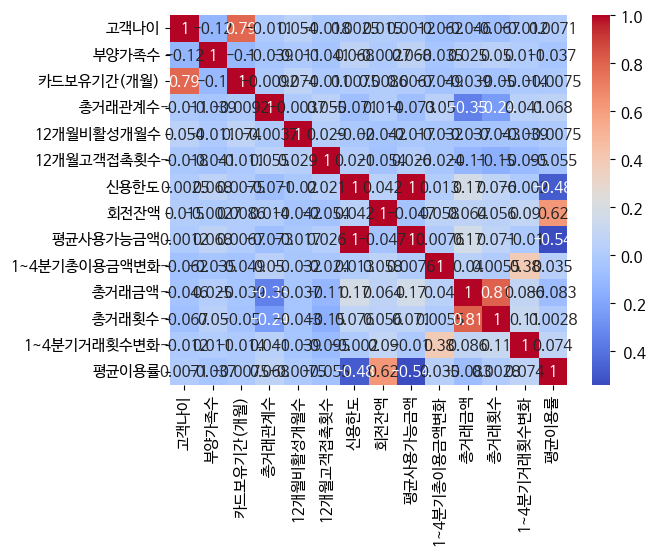

In [38]:
num_col = df.select_dtypes(include='number').columns
corr = df[num_col].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## 데이터 구간화

### 나이 구간 범주화

In [39]:
def convert_age_to_group(age):
    if age <= 30:
        return 0
    elif age <= 40:
        return 1
    elif age <= 50:
        return 2
    elif age <= 60:
        return 3
    else:
        return 4

# 적용
df['나이그룹'] = df['고객나이'].apply(convert_age_to_group)

# '고객나이' 열 삭제
df = df.drop(columns=['고객나이'])

### 카드 보유 개월 -> 카드 보유 년

In [40]:
def convert_months_to_years(months):
    if months >= 48:
        return 4
    elif months >= 36:
        return 3
    elif months >= 24:
        return 2
    else:
        return 1

df['카드보유년'] = df['카드보유기간(개월)'].apply(convert_months_to_years)
df = df.drop('카드보유기간(개월)',axis=1)

### 수입 범주 -> 수입

In [41]:
# 수입 범주 변환 함수
def convert_income(income_str):
    if income_str == 'Less than $40K':
        return 1
    elif income_str == '$40K - $60K':
        return 2
    elif income_str == '$60K - $80K':
        return 3
    elif income_str == '$80K - $120K':
        return 4
    elif income_str == '$120K +':
        return 5
    else:  # 'Unknown' 혹은 그 외 값
        return 0

# 적용
df['수입'] = df['수입범주'].apply(convert_income)
df = df.drop('수입범주', axis=1)

### 교육 수준 -> 정수형 범주형

In [42]:
def convert_education_level(education_str):
    if education_str == 'Uneducated':
        return 1
    elif education_str == 'High School':
        return 2
    elif education_str == 'College':
        return 3
    elif education_str == 'Graduate':
        return 4
    elif education_str == 'Post-Graduate':
        return 5
    elif education_str == 'Doctorate':
        return 6
    elif education_str == 'Unknown':
        return 0

df['교육수준'] = df['교육수준'].apply(convert_education_level)

## 원-핫 인코딩

In [46]:
df = pd.get_dummies(df, columns=["결혼여부", "카드등급",'성별'], drop_first=True)
df.columns


Index(['이탈여부', '부양가족수', '교육수준', '총거래관계수', '12개월비활성개월수', '12개월고객접촉횟수', '신용한도',
       '회전잔액', '평균사용가능금액', '1~4분기총이용금액변화', '총거래금액', '총거래횟수', '1~4분기거래횟수변화',
       '평균이용률', '나이그룹', '카드보유년', '수입', '결혼여부_Married', '결혼여부_Single',
       '결혼여부_Unknown', '카드등급_Gold', '카드등급_Platinum', '카드등급_Silver', '성별_M'],
      dtype='object')

## 이상치 제어 겸 스케일링



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


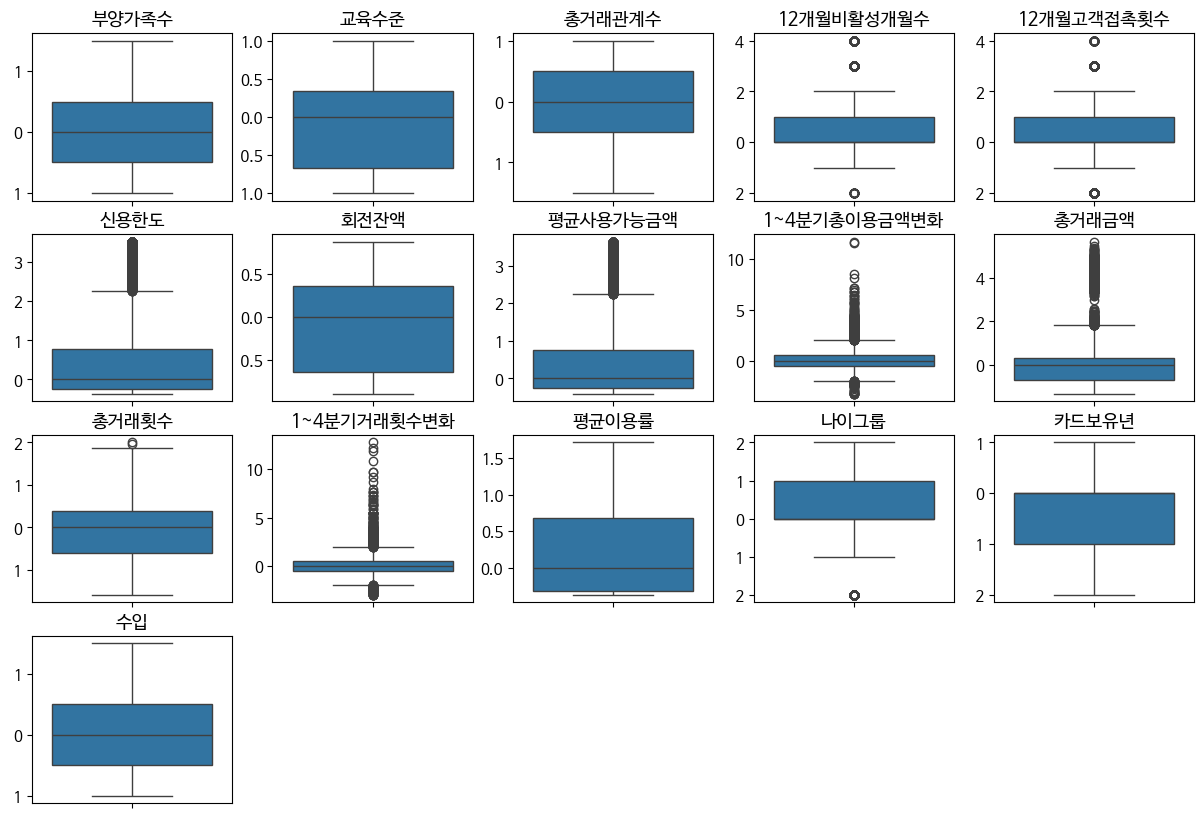

In [47]:
import seaborn as sns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

num_col = df.select_dtypes(include='number').columns
df[num_col] = scaler.fit_transform(df[num_col].values)

plt.figure(figsize=(15,10))
for idx,col in enumerate(num_col):
    plt.subplot(4,5,idx+1)
    sns.boxplot(data = df[col])
    plt.ylabel('')
    plt.title(col)

plt.show()

In [48]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
num_col = ['신용한도', '회전잔액', '총거래금액']
df[num_col] = scaler.fit_transform(df[num_col].values)
num_col

['신용한도', '회전잔액', '총거래금액']

In [49]:
from google.colab import files

# 스케일러 저장 및 다운로드
import joblib
joblib.dump(scaler, "scaler.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


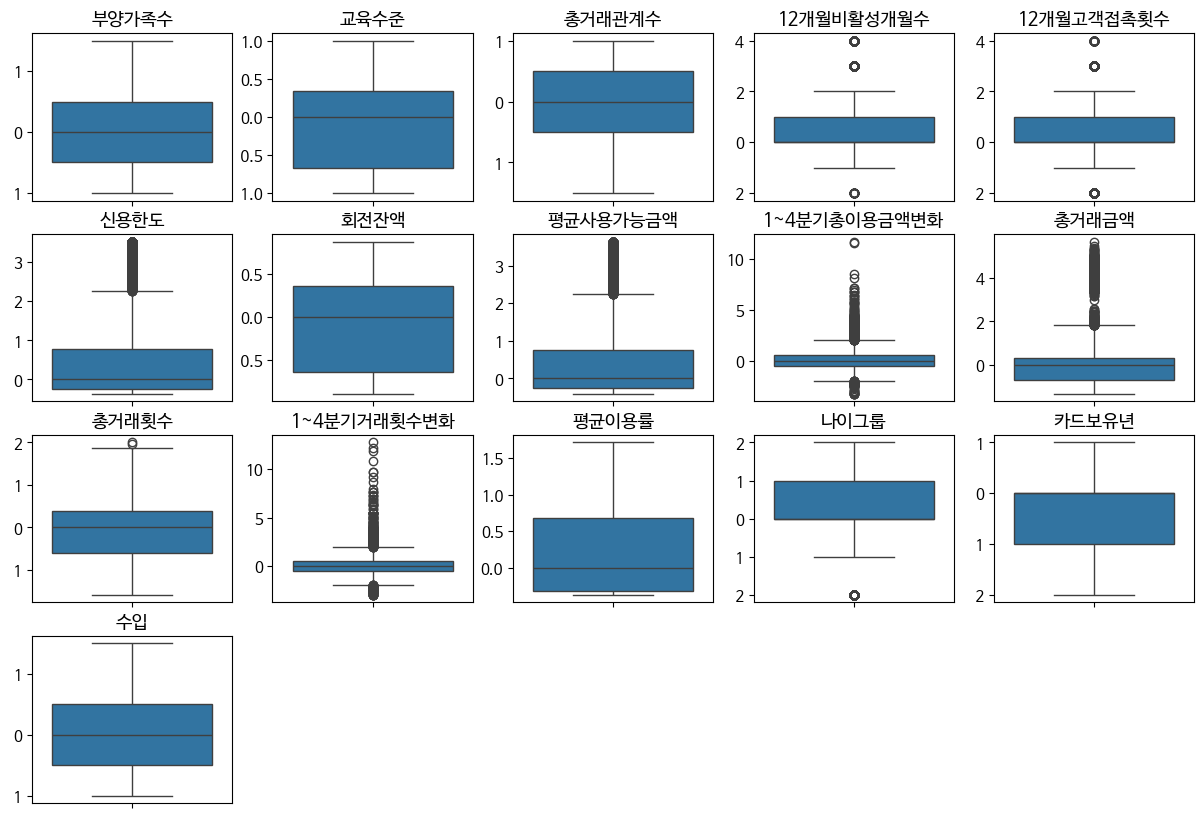

In [50]:
import seaborn as sns

num_col = df.select_dtypes(include='number').columns

len(num_col), num_col

plt.figure(figsize=(15,10))
for idx,col in enumerate(num_col):
    plt.subplot(4,5,idx+1)
    sns.boxplot(data = df[col])
    plt.ylabel('')
    plt.title(col)

plt.show()

## 처리 상관관계 확인


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


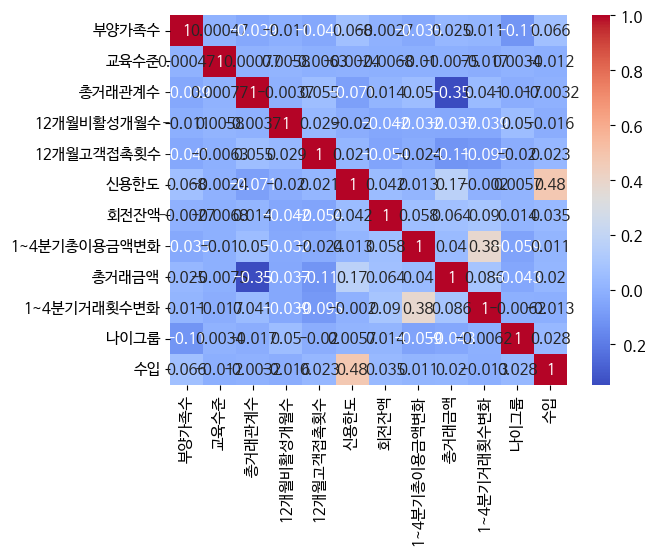

Highly correlated variables: set()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


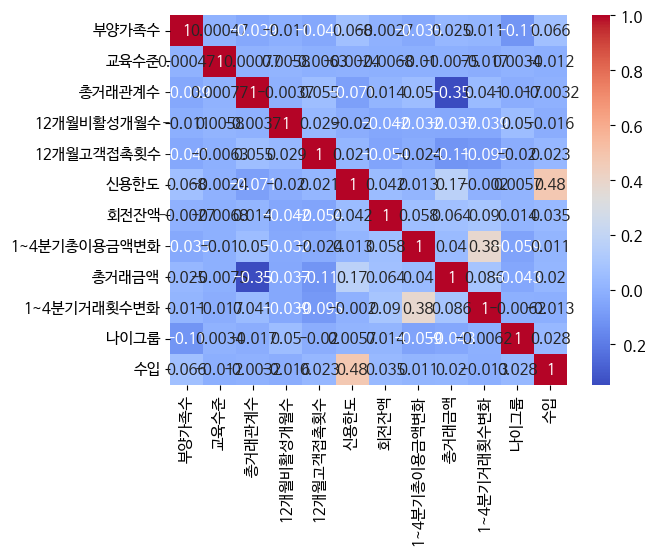

In [53]:
num_col = df.select_dtypes(include='number').columns

## 변수 처리 이전 상관관계 히트맵
corr = df[num_col].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# 상관계수가 0.9 이상인 변수들을 찾기
threshold = 0.5
high_corr_var = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            high_corr_var.add(colname)

print("Highly correlated variables:", high_corr_var)
df = df.drop(list(high_corr_var),axis=1)

## 변수 처리 이후 상관관계 히트맵
corr = df[num_col].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## 클래스 불균형

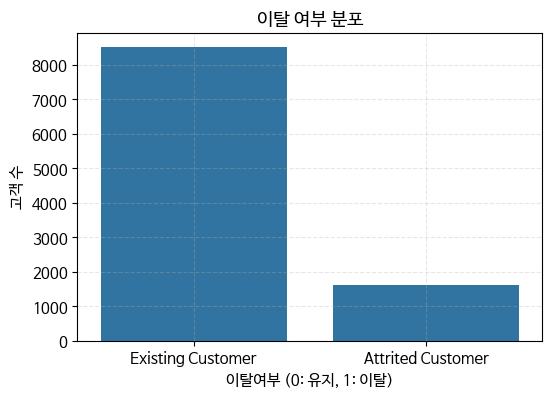

In [54]:
# 이탈여부 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="이탈여부")
plt.title("이탈 여부 분포")
plt.xlabel("이탈여부 (0: 유지, 1: 이탈)")
plt.ylabel("고객 수")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [55]:
print(df['이탈여부'].value_counts(normalize=True).round(3))
print(df['이탈여부'].value_counts())

이탈여부
Existing Customer    0.839
Attrited Customer    0.161
Name: proportion, dtype: float64
이탈여부
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def over_sampling(X,y):
    print(y.value_counts())
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print(y_resampled.value_counts())
    print(X.shape, X_resampled.shape)

    return X_resampled, y_resampled

X = df.drop("이탈여부", axis=1)
y = df["이탈여부"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
X_train, y_train = over_sampling(X_train,y_train)

이탈여부
Existing Customer    6801
Attrited Customer    1300
Name: count, dtype: int64
이탈여부
Existing Customer    6801
Attrited Customer    6801
Name: count, dtype: int64
(8101, 19) (13602, 19)


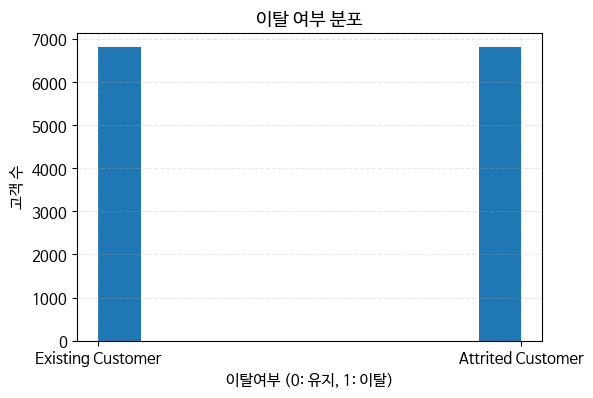

In [58]:
# 이탈여부 시각화
plt.figure(figsize=(6, 4))
y_train.hist()
plt.title("이탈 여부 분포")
plt.xlabel("이탈여부 (0: 유지, 1: 이탈)")
plt.ylabel("고객 수")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [59]:
# 데이터셋 크기 확인
print("데이터셋 분리 완료:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Train label 분포:\n{y_train.value_counts(normalize=True).round(3)}")
print(f"test label 분포:\n{y_test.value_counts(normalize=True).round(3)}")


데이터셋 분리 완료:
Train: (13602, 19), Test: (2026, 19)
Train label 분포:
이탈여부
Existing Customer    0.5
Attrited Customer    0.5
Name: proportion, dtype: float64
test label 분포:
이탈여부
Existing Customer    0.839
Attrited Customer    0.161
Name: proportion, dtype: float64


## 처리한 csv파일 저장

In [ ]:
df.to_csv('bank.csv', index=False, encoding='utf-8-sig')